#Тема “Создание признакового пространства”

###Продолжим обработку данных с Твиттера. 

In [97]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
path_les_1 = '/content/drive/MyDrive/Colab Notebooks/GB/Introduction to Natural Language Processing/lesson_1'

In [100]:
combine_df = pd.read_pickle(f'{path_les_1}/prepared_dataframe.pkl')

In [101]:
combine_df.head(5)

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [102]:
combine_df['label'].unique()

array([ 0.,  1., nan])

###1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.

* Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
* Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
*	Исключим стоп-слова с помощью stop_words='english'. 
*	Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().


In [103]:
count_vectorizer = CountVectorizer(ngram_range=(1, 1), 
                                   max_df=0.9,
                                   preprocessor=' '.join,
                                   max_features=1000,
                                   stop_words='english',
                                   analyzer='word', 
                                   binary=False,)

In [104]:
tweet_stemmed_bag_of_words = count_vectorizer.fit_transform(combine_df['tweet_stemmed'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
df_tweet_stemmed_bag_of_words = pd.DataFrame(tweet_stemmed_bag_of_words.toarray(), columns = feature_names)
df_tweet_stemmed_bag_of_words.head(5)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,anim,anniversari,announc,anoth,answer,anti,...,whatev,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
df_tweet_stemmed_bag_of_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, abl to yummi
dtypes: int64(1000)
memory usage: 375.1 MB


In [106]:
tweet_lemmatized_bag_of_words = count_vectorizer.fit_transform(combine_df['tweet_lemmatized'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
df_tweet_lemmatized_bag_of_words = pd.DataFrame(tweet_lemmatized_bag_of_words.toarray(), columns = feature_names)
df_tweet_lemmatized_bag_of_words.head(5)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,altwaystoheal,amazing,america,american,amp,anger,angry,animal,anniversary,anti,anxiety,anymore,app,apple,arrived,ask,attack,august,available,award,...,wild,win,wine,winner,wisdom,wish,wishing,woh,woman,wonder,wonderful,word,work,working,workout,world,worry,worst,wow,writing,wrong,wtf,xx,xxx,ya,yay,yeah,year,yes,yesterday,yo,yoga,york,young,youtube,yoyou,yoyour,yoyoyou,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
df_tweet_lemmatized_bag_of_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, able to yummy
dtypes: int64(1000)
memory usage: 375.1 MB


###2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
*	Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
*	Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
*	Исключим стоп-слова с помощью stop_words='english'.
*	Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().


In [108]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features = 1000, stop_words='english', preprocessor=' '.join,)

In [109]:
tfidf_tweet_stemmed = tfidf_vectorizer.fit_transform(combine_df['tweet_stemmed'])
# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
df_tfidf_tweet_stemmed = pd.DataFrame(tfidf_tweet_stemmed.toarray(), columns = feature_names)
df_tfidf_tweet_stemmed.head(5)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,anim,anniversari,announc,anoth,answer,anti,...,whatev,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744148,0.392399,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [110]:
df_tfidf_tweet_stemmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, abl to yummi
dtypes: float64(1000)
memory usage: 375.1 MB


In [111]:
tfidf_tweet_lemmatized = tfidf_vectorizer.fit_transform(combine_df['tweet_lemmatized'])
# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
df_tfidf_tweet_lemmatized = pd.DataFrame(tfidf_tweet_lemmatized.toarray(), columns = feature_names)
df_tfidf_tweet_lemmatized.head(5)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,altwaystoheal,amazing,america,american,amp,anger,angry,animal,anniversary,anti,anxiety,anymore,app,apple,arrived,ask,attack,august,available,award,...,wild,win,wine,winner,wisdom,wish,wishing,woh,woman,wonder,wonderful,word,work,working,workout,world,worry,worst,wow,writing,wrong,wtf,xx,xxx,ya,yay,yeah,year,yes,yesterday,yo,yoga,york,young,youtube,yoyou,yoyour,yoyoyou,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.742113,0.39173,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0


In [112]:
df_tfidf_tweet_lemmatized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, able to yummy
dtypes: float64(1000)
memory usage: 375.1 MB


###3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы.

In [113]:
path_les_2 = '/content/drive/MyDrive/Colab Notebooks/GB/Introduction to Natural Language Processing/lesson_2'
data = open(f'{path_les_2}/corpus.txt').read()

In [114]:
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [115]:
trainDF['label'].unique()

array(['__label__2', '__label__1'], dtype=object)

In [116]:
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [164]:
# trainDF_text_list = trainDF['text']
# train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF_text, trainDF['label'])

trainDF_text = combine_df.dropna()['tweet_stemmed']
trainDF_text_list = [item for sublist in combine_df.dropna()['tweet_stemmed'].to_list() for item in sublist]
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF_text, 
                                                                      combine_df.dropna()['label'])
train_x = [' '.join(item) for item in train_x]
valid_x = [' '.join(item) for item in valid_x]

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [175]:
def get_score_count_vectorizer(param_max_features, param_max_df, using_rca=False):
  print(f'{param_max_features} {param_max_df}')
  
  count_vect = CountVectorizer(analyzer='word', 
                               token_pattern=r'\w{1,}', 
                               max_features=param_max_features,
                               max_df=param_max_df)
  
  count_vect.fit(trainDF_text_list)

  xtrain_count = count_vect.transform(train_x)
  xvalid_count = count_vect.transform(valid_x)
  
  if using_rca:
    xtrain_count = xtrain_count.todense()
    xtrain_count = PCA(n_components=param_max_features).fit_transform(xtrain_count)

  classifier = linear_model.LogisticRegression()
  classifier.fit(xtrain_count, train_y)
  predictions = classifier.predict(xvalid_count)
  # predictions
  # xtrain_count.shape
  return accuracy_score(valid_y, predictions)

In [180]:
def get_score_tfidf_vectorizer(param_max_features, param_max_df, using_rca=False):
  print(f'{param_max_features} {param_max_df}')

  tfidf_vectorizer = TfidfVectorizer(max_features=param_max_features,
                                     max_df=param_max_df, 
                                     stop_words='english')
  
  tfidf_vectorizer.fit(trainDF_text_list)
  xtrain_count =  tfidf_vectorizer.transform(train_x)
  xvalid_count =  tfidf_vectorizer.transform(valid_x)

  if using_rca:
    xtrain_count = xtrain_count.todense()
    xtrain_count = PCA(n_components=param_max_features).fit_transform(xtrain_count)

  classifier = linear_model.LogisticRegression()
  classifier.fit(xtrain_count, train_y)
  predictions = classifier.predict(xvalid_count)

  return accuracy_score(valid_y, predictions)

In [179]:
def test_params(params, title, tfidf=False, using_rca=False):
  plt.figure(figsize=(16,7))

  names = []
  values = []

  for index, param in params.iterrows():
    param_max_features = int(param['param_max_features'])

    if tfidf:
      accuracy_score = get_score_tfidf_vectorizer(param_max_features,
                                                    param['param_max_df'],
                                                  using_rca)
    else:
      accuracy_score = get_score_count_vectorizer(param_max_features,
                                                    param['param_max_df'],
                                                  using_rca)
    _label = f'{param_max_features} {param["param_max_df"]}'
    names.append(_label)
    values.append(accuracy_score)

  plt.bar(names, values)
  plt.title(title)
  plt.grid()
  plt.show()

  print(values)

####CountVectorizer

100 1.0
300 1.0
500 1.0
1000 1.0
1500 1.0
2000 1.0
2300 1.0
2400 1.0
2600 1.0


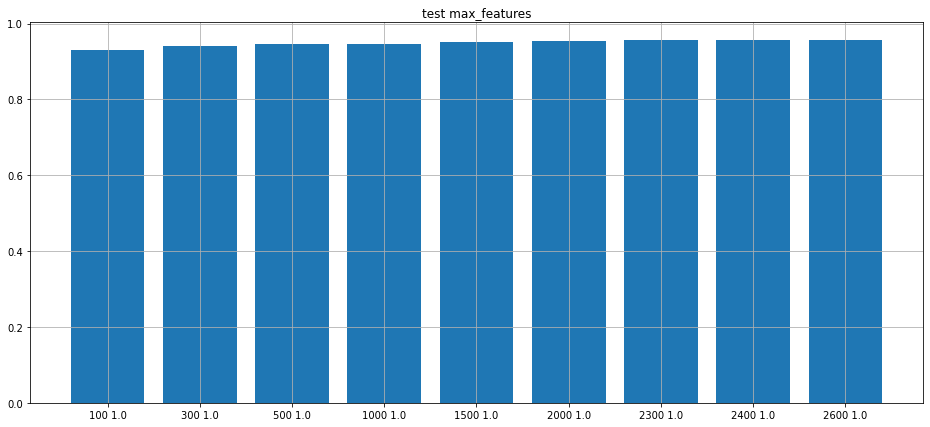

[0.9311725691402828, 0.9414341133775498, 0.944812914528845, 0.9468151670629458, 0.9505693905643849, 0.9549493179827305, 0.9554498811162558, 0.9554498811162558, 0.9554498811162558]


In [171]:
params_dict = {'param_max_features': [100, 300, 500, 1000, 1500, 2000, 2300, 2400, 2600],
                'param_max_df': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
params = pd.DataFrame(data=params_dict)
test_params(params, 'test max_features')

Для датафрейма лекции по графику видно что особенный рост score идет до 1000 max_features после этого наблюдается рост, но не такой сильный. По тесту ниже выяснил что оптимальным max_df, для score, является 1, тогда тут при max_features = 2600 добиваемся лучшего score

Для датафрейма твиттера максимальный score достигается при 2300 max_features

2600 0.1
2600 0.3
2600 0.6
2600 0.8
2600 1.0


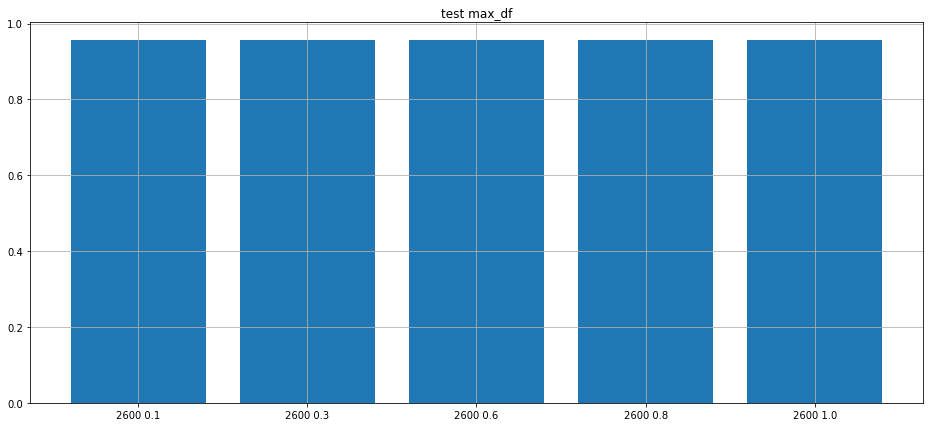

[0.9554498811162558, 0.9554498811162558, 0.9554498811162558, 0.9554498811162558, 0.9554498811162558]


In [172]:
params_dict = {'param_max_features': [2600, 2600, 2600, 2600, 2600],
               'param_max_df': [0.1, 0.3, 0.6, 0.8, 1]}
params = pd.DataFrame(data=params_dict)
test_params(params, 'test max_df')

Для датафрейма лекции оптимальным max_df, для score, является 1

Для датафрейма твиттера особой роли не видно и 0.1 подходит

####TfidfVectorizer

100 1.0
500 1.0
1000 1.0
1500 1.0
2000 1.0
2600 1.0
3000 1.0
5000 1.0


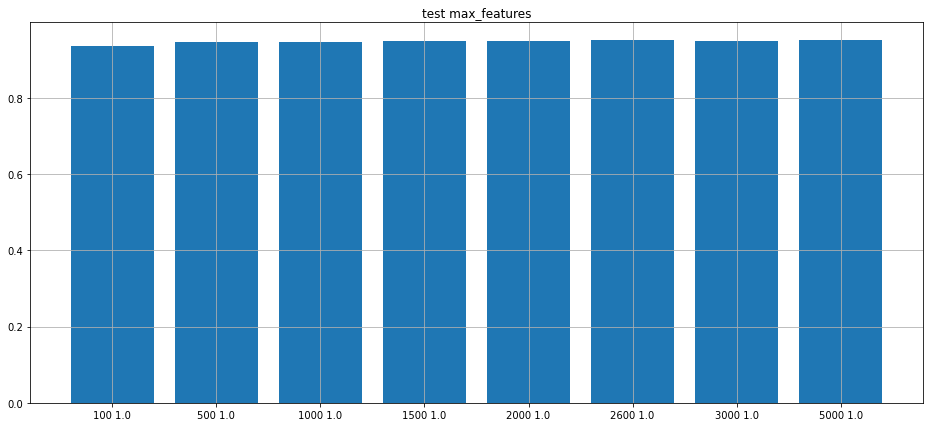

[0.9350519334251033, 0.945688900012514, 0.9473157301964711, 0.9498185458640971, 0.9503191089976223, 0.9506945313477663, 0.9503191089976223, 0.9504442497810036]


In [173]:
params_dict = {'param_max_features': [100, 500, 1000, 1500, 2000, 2600, 3000, 5000],
                'param_max_df': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
params = pd.DataFrame(data=params_dict)
test_params(params, 'test max_features', True)

Для датафрейма лекции получается по Score 0.85 при max_features=2600 CountVectorizer в данном случае лучше.

Для датафрейма твиттера TfidfVectorizer начинает выигрывать только при max_features в районе 5000

1000 0.1
1000 0.4
1000 0.8
1000 1.0


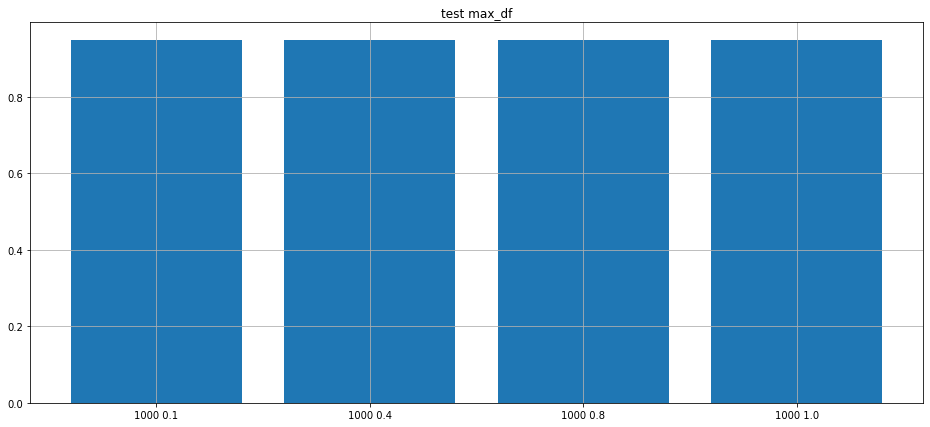

[0.9473157301964711, 0.9473157301964711, 0.9473157301964711, 0.9473157301964711]


In [170]:
params_dict = {'param_max_features': [1000, 1000, 1000, 1000],
               'param_max_df': [0.1, 0.4, 0.8, 1]}
params = pd.DataFrame(data=params_dict)
test_params(params, 'test max_df', True)

Для датафрейма твиттера особой роли не видно и 0.1 подходит

####PCA

2300 1.0


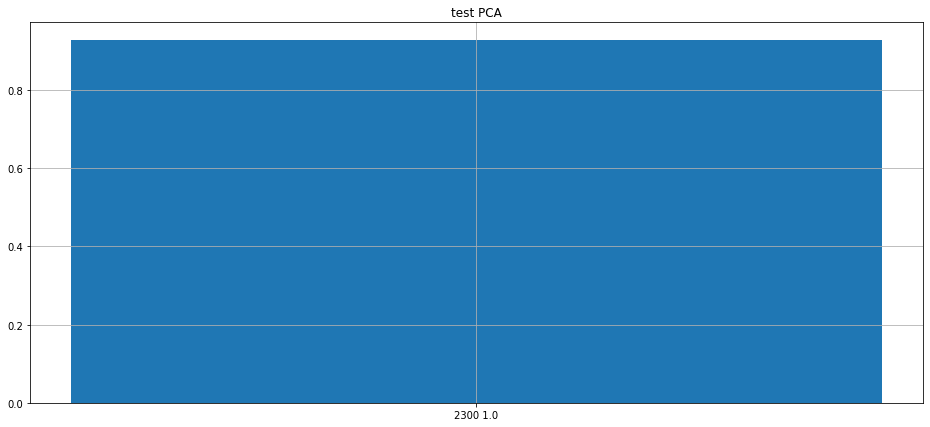

[0.9267926417219372]


In [181]:
params_dict = {'param_max_features': [2300],
                'param_max_df': [1.0]}
params = pd.DataFrame(data=params_dict)
test_params(params, 'test PCA', False, True)

5000 1


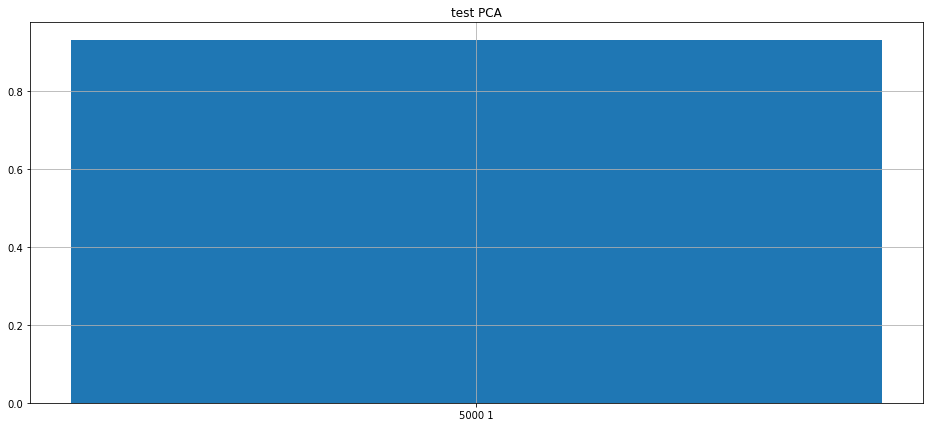

[0.9312977099236641]


In [183]:
params_dict = {'param_max_features': [5000],
               'param_max_df': [1]}
params = pd.DataFrame(data=params_dict)
test_params(params, 'test PCA', True, True)

Для датафреймов лекции и твиттера наблюдается падение score